# Cài đặt môi trường

In [ ]:
!pip install opencv-python matplotlib

In [ ]:
url = "https://www.w3schools.com/w3css/img_lights.jpg"
!mkdir "images"
!wget -O "./images/input.jpg" $url

In [60]:
import matplotlib as mpl
%matplotlib inline
mpl.rc('image', cmap='gray')
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

# Hiện, lưu ảnh

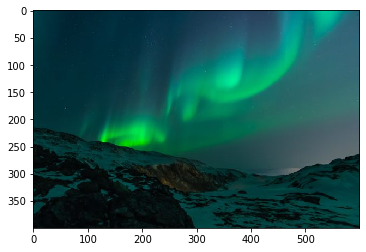

In [54]:
# show image, convert bgr -> rgb
img = cv2.imread('./images/input.jpg')[:,:,::-1]
plt.imshow(img)
plt.show()

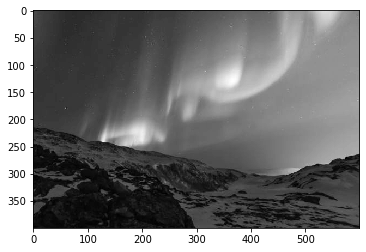

True

In [58]:
# save image
gray_img = cv2.imread('images/input.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img)
plt.show()
write_result = cv2.imwrite('images/output.jpg', gray_img)
write_result

# Image format
* imwrite hỗ trợ chuyển format cho ảnh

In [57]:
write_result = cv2.imwrite('images/output.png', img, [cv2.IMWRITE_PNG_COMPRESSION])
write_result

True

# Color spaces

Không gian màu là mô hình toán học mô tả khoảng màu dưới dạng một bộ giá trị (thường là từ 3 tới 4 giá trị)
Một số không gian màu phổ biến:
1. RGB: bộ giá trị 3 màu cơ bản
2. YUV: Y - độ sáng, UV - thành phần màu

<img src="https://blogs.gnome.org/rbultje/files/2016/11/rgbyuv_tango.png" width="300">

3. HSV: H - gam màu, S - độ bão hòa, V - độ sáng

<img src="http://learn.leighcotnoir.com/wp-content/uploads/2011/07/hsv7.jpg" width="300"/>

In [17]:
print([x for x in dir(cv2) if x.startswith('COLOR_')][:18])

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG']


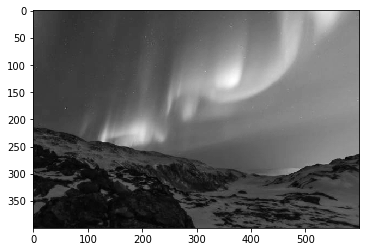

In [8]:
img = cv2.imread('./images/input.jpg', cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)
plt.show()

In [7]:
color_formats = [cv2.COLOR_RGB2YUV, cv2.COLOR_RGB2HSV, cv2.COLOR_RGB2Lab]

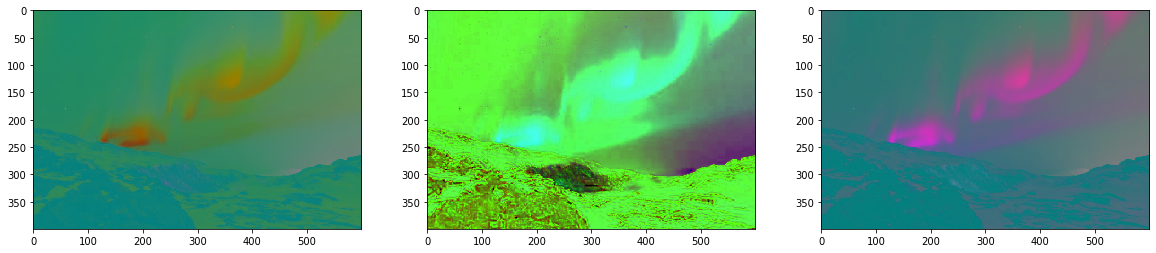

In [47]:
fig=plt.figure(figsize=(20, 20))
columns = 3
rows = 1
for i in range(1, columns*rows +1):
    formated_img = cv2.cvtColor(img, color_formats[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(formated_img)
plt.show()

# Image translation - Dịch chuyển ảnh:
* Ảnh giữ nguyên hướng xoay, kích cỡ.
* Thay đổi tạo độ ảnh (thay đổi x và y) thông qua ma trận biến đổi
$$T=\begin{bmatrix}1 & 0 & t_x\\ 0 & 1 & t_y\end{bmatrix}$$
* warpAffine nhận ảnh, ma trận biến đổi, kích cỡ mong muốn.

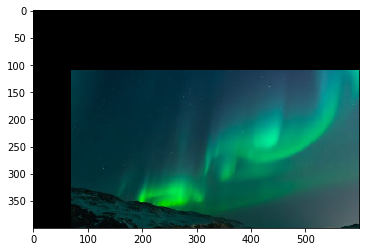

In [49]:
img = cv2.imread('images/input.jpg')[:,:,::-1]
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols,num_rows))
plt.imshow(img_translation)
plt.show()

# Image rotation - Xoay ảnh
* Ma trận xoay ảnh: $\theta$ là góc xoay ngược chiều kim đồng hồ
$$R=\left[\begin{array}{ll}{\cos \theta} & {-\sin \theta} \\ {\sin \theta} & {\cos \theta}\end{array}\right]$$
* getRotationMatrix2D nhận tọa độ tâm xoay, góc xoay, tỉ lệ kích thước trả về ma trận xoay

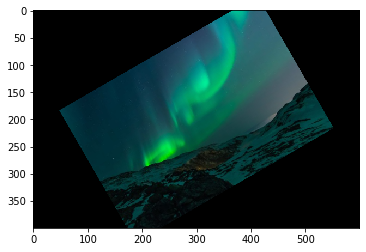

In [50]:
img = cv2.imread('images/input.jpg')[:,:,::-1]
num_rows, num_cols = img.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 0.7)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
plt.imshow(img_rotation)
plt.show()

# Image scaling - thay đổi kích thước ảnh
* Có 2 cách: thay đổi theo tỉ lệ và thay đổi theo kích thước chính xác
* resize nhận ảnh, tỉ lệ / kích thước mới, phép nội suy
* phép nội suy là cách làm đầy các pixel còn thiếu khi thay đổi kích thước:
    * dùng linear/cubic khi tăng kích cỡ ảnh
    * dùng area-based khi thu nhỏ ảnh

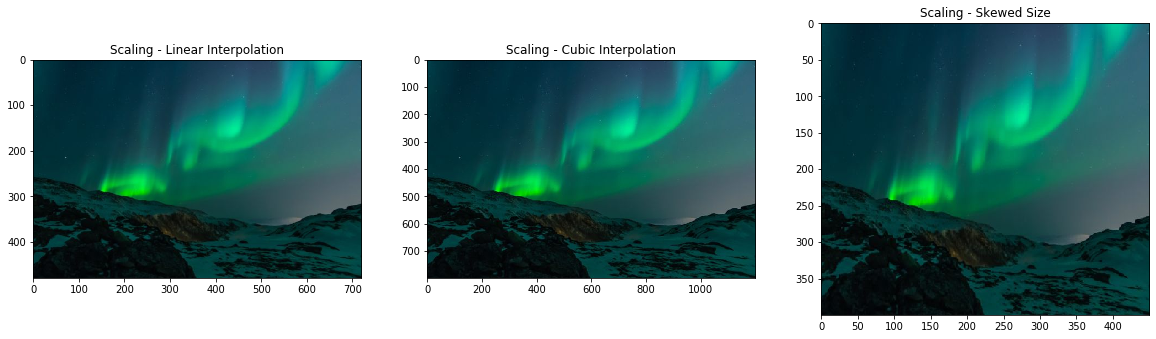

In [51]:
img = cv2.imread('images/input.jpg')[:,:,::-1]
img_scaled_1 = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
img_scaled_2 = cv2.resize(img,None,fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
img_scaled_3 = cv2.resize(img,(450, 400), interpolation=cv2.INTER_AREA)

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img_scaled_1)
ax1.set_title('Scaling - Linear Interpolation')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img_scaled_2)
ax2.set_title('Scaling - Cubic Interpolation')
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(img_scaled_3)
ax2.set_title('Scaling - Skewed Size')
fig.show()

# Affine transformations - Biến đổi afin
* Công thức:
$$f: X \rightarrow Y | x \mapsto M x+b$$
    * M là phép biến đổi tuyến tính
    * $x$ là một vector trong không gian $X$
    * $b$ là một vector trong không gian $Y$
* Biến đổi theo phương trình:
$$(x', y') = (A x+B y+C, D x+E y+F)$$
* Biến đổi theo ma trận:
$$\left[\begin{array}{l}{x^{\prime}} \\ {y^{\prime}} \\ {1}\end{array}\right]=\left[\begin{array}{lll}{a} & {b} & {t_{x}} \\ {c} & {d} & {t_{y}} \\ {0} & {0} & {1}\end{array}\right]\left[\begin{array}{l}{x} \\ {y} \\ {1}\end{array}\right]$$
    * (x, y): tọa độ ban đầu của pixel
    * (x', y'): tọa độ của pixel sau khi biến đổi
* Một số tính chất của biến đổi affine:
    * Bảo toàn đường thẳng : ảnh của đường thẳng qua phép biến đổi affine là đường thẳng.
    * Bảo toàn tính song song : ảnh của hai đường thẳng song song là song song.
    * Bảo toàn tỉ lệ khoảng cách : Nếu điểm M chia đoạn AB theo tỉ số m thì ảnh của M là M' cũng chia đoạn AB theo tỉ số m.
* getAffineTransform nhận vị trí 3 điểm ban đầu và vị trí 3 điểm mới và trả về ma trận biến đổi affine thỏa mãn sự thay đổi vị trí 3 điểm

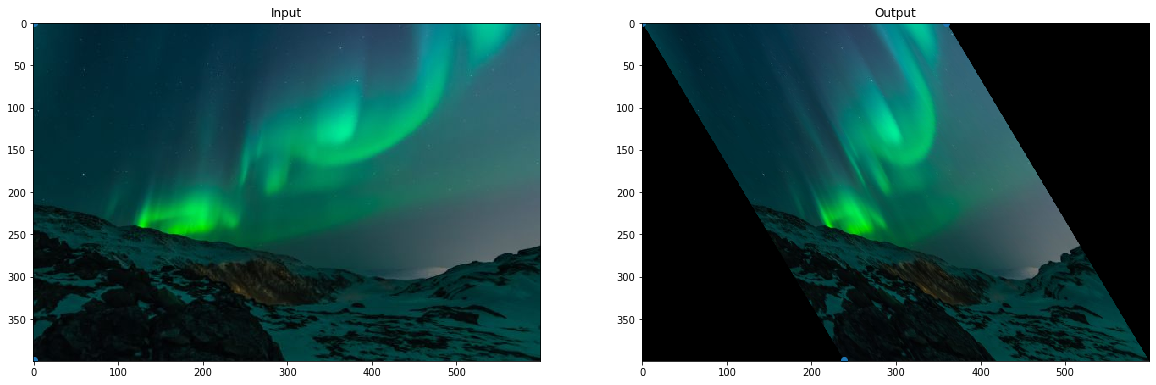

In [52]:
img = cv2.imread('images/input.jpg')[:,:,::-1]
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]]) 
dst_points = np.float32([[0,0], [int(0.6*(cols-1)),0], [int(0.4*(cols-1)),rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))

src_x, src_y = zip(*src_points)
dst_x, dst_y = zip(*dst_points)


fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(src_x, src_y)
ax1.imshow(img)
ax1.set_title("Input")

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(dst_x, dst_y)
ax2.imshow(img_output)
ax2.set_title("Output")
fig.show()

# Projective transformations
* Biến đổi theo ma trận
$$\left[\begin{array}{c}{x^{\prime}} \\ {y^{\prime}} \\ {1}\end{array}\right] \cong\left[\begin{array}{c}{w x^{\prime}} \\ {w y^{\prime}} \\ {w}\end{array}\right]=\left[\begin{array}{ccc}{a} & {b} & {c} \\ {d} & {e} & {f} \\ {g} & {h} & {i}\end{array}\right]\left[\begin{array}{c}{x} \\ {y} \\ {1}\end{array}\right]$$
    * (x, y): tọa độ ban đầu của pixel
    * (x', y'): tọa độ của pixel sau khi biến đổi
* Một số tính chất của biến đổi projective:
    * Biến đổi projective không giữ tính song song, độ dài, hay góc của 1 đường nối hai điểm.
    * Biến đổi projective giữ tính Incidence (một điểm trên một đường vẫn sẽ nằm trên đường đó) và Collinearity (các điểm thuộc một đường vẫn sẽ thuộc đường đó theo đúng thứ tự)

<img src="https://www.graphicsmill.com/docs/gm5/TransformationsDifference.png" align="center">

* getPerspectiveTransform nhận vị trí 4 điểm ban đầu và vị trí 4 điểm mới và trả về ma trận biến đổi perpective thỏa mãn sự thay đổi vị trí 4 điểm
* warpPerspective nhận ảnh, ma trận biến đổi, kích thước mới

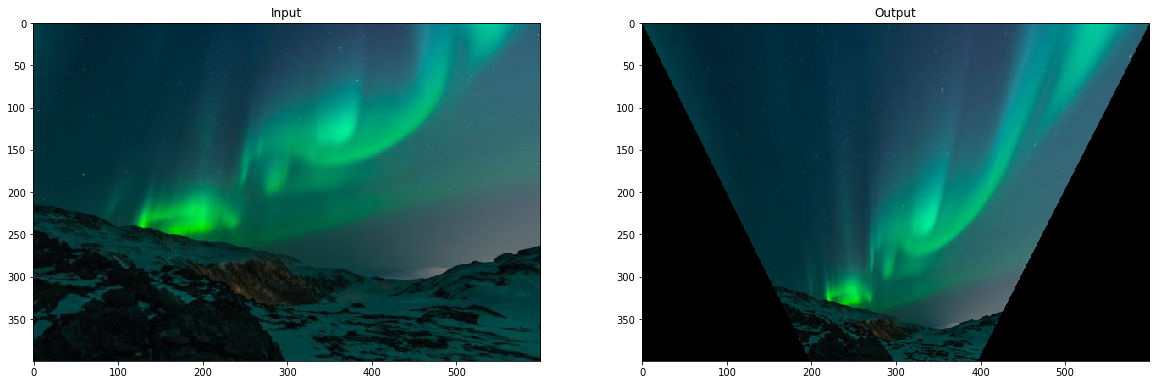

In [53]:
img = cv2.imread('images/input.jpg')[:,:,::-1]
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1],
[int(0.66*cols),rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax1.set_title("Input")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_output)
ax2.set_title("Output")
fig.show()

# Image warping
* Có thể trực tiếp biến đổi hình học theo công thức tự xây dựng.

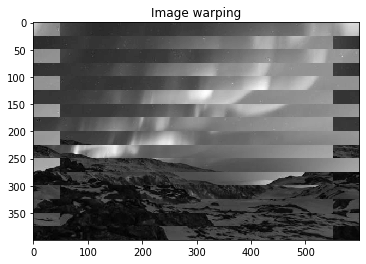

In [111]:
img = cv2.imread('images/input.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape
img_output = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = 50 if i//25%2 == 1 else -50
        offset_y = 0
        img_output[i,j] = img[i,(j+offset_x)%cols]

plt.imshow(img_output)
plt.title('Image warping')
plt.show()